# Part B - Linear Regression
- Generate a linear model for your data:
- Find a significant linear relation of your choosing in your data. Create a multivariate linear model. (50 points)
- Answer the following questions for the multivariate linear model:
    * Is the relationship significant?   
    * Are any model assumptions violated?   
    * Is there any multi-colinearity in the model?   
    * In the multiple regression models are predictor variables independent of all the other predictor variables?   
    * In in multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.   
    * Does the model make sense?  
    * Cross-validate the model. How well did it do?      
    * Does regularization help with creating models that validate better on out of sample data? 

In [1]:
#Declaring imports for importing modules

import os
import pandas as pd, DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from __future__ import print_function
%matplotlib inline
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import RidgeCV
from sklearn import metrics
from scipy import stats
from sklearn.cross_validation import train_test_split
import warnings
warnings.filterwarnings('ignore')

/Users/palakagrawal/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/palakagrawal/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Current path is fetched
cur_path = os.path.dirname(os.getcwd())
print(cur_path)
file_path = cur_path + '/data/Wine_data.csv'

/Users/palakagrawal/Desktop/Courses/ADS/assignments/assignment2


In [3]:
#Reading Schedule data into Dataframe
winequality_frame = pd.read_csv(file_path, encoding='latin-1')
winequality_frame.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Checking for null values

winequality_frame.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [5]:
#Describing the dataset info

winequality_frame.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#splitting data into test and train

train=winequality_frame.sample(frac=0.8,random_state=200)
test = winequality_frame.drop(train.index)
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
366,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,7
1325,6.7,0.460,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
133,6.6,0.500,0.01,1.5,0.060,17.0,26.0,0.99520,3.40,0.58,9.8,6
1418,7.8,0.530,0.01,1.6,0.077,3.0,19.0,0.99500,3.16,0.46,9.8,5
1258,6.8,0.640,0.00,2.7,0.123,15.0,33.0,0.99538,3.44,0.63,11.3,6


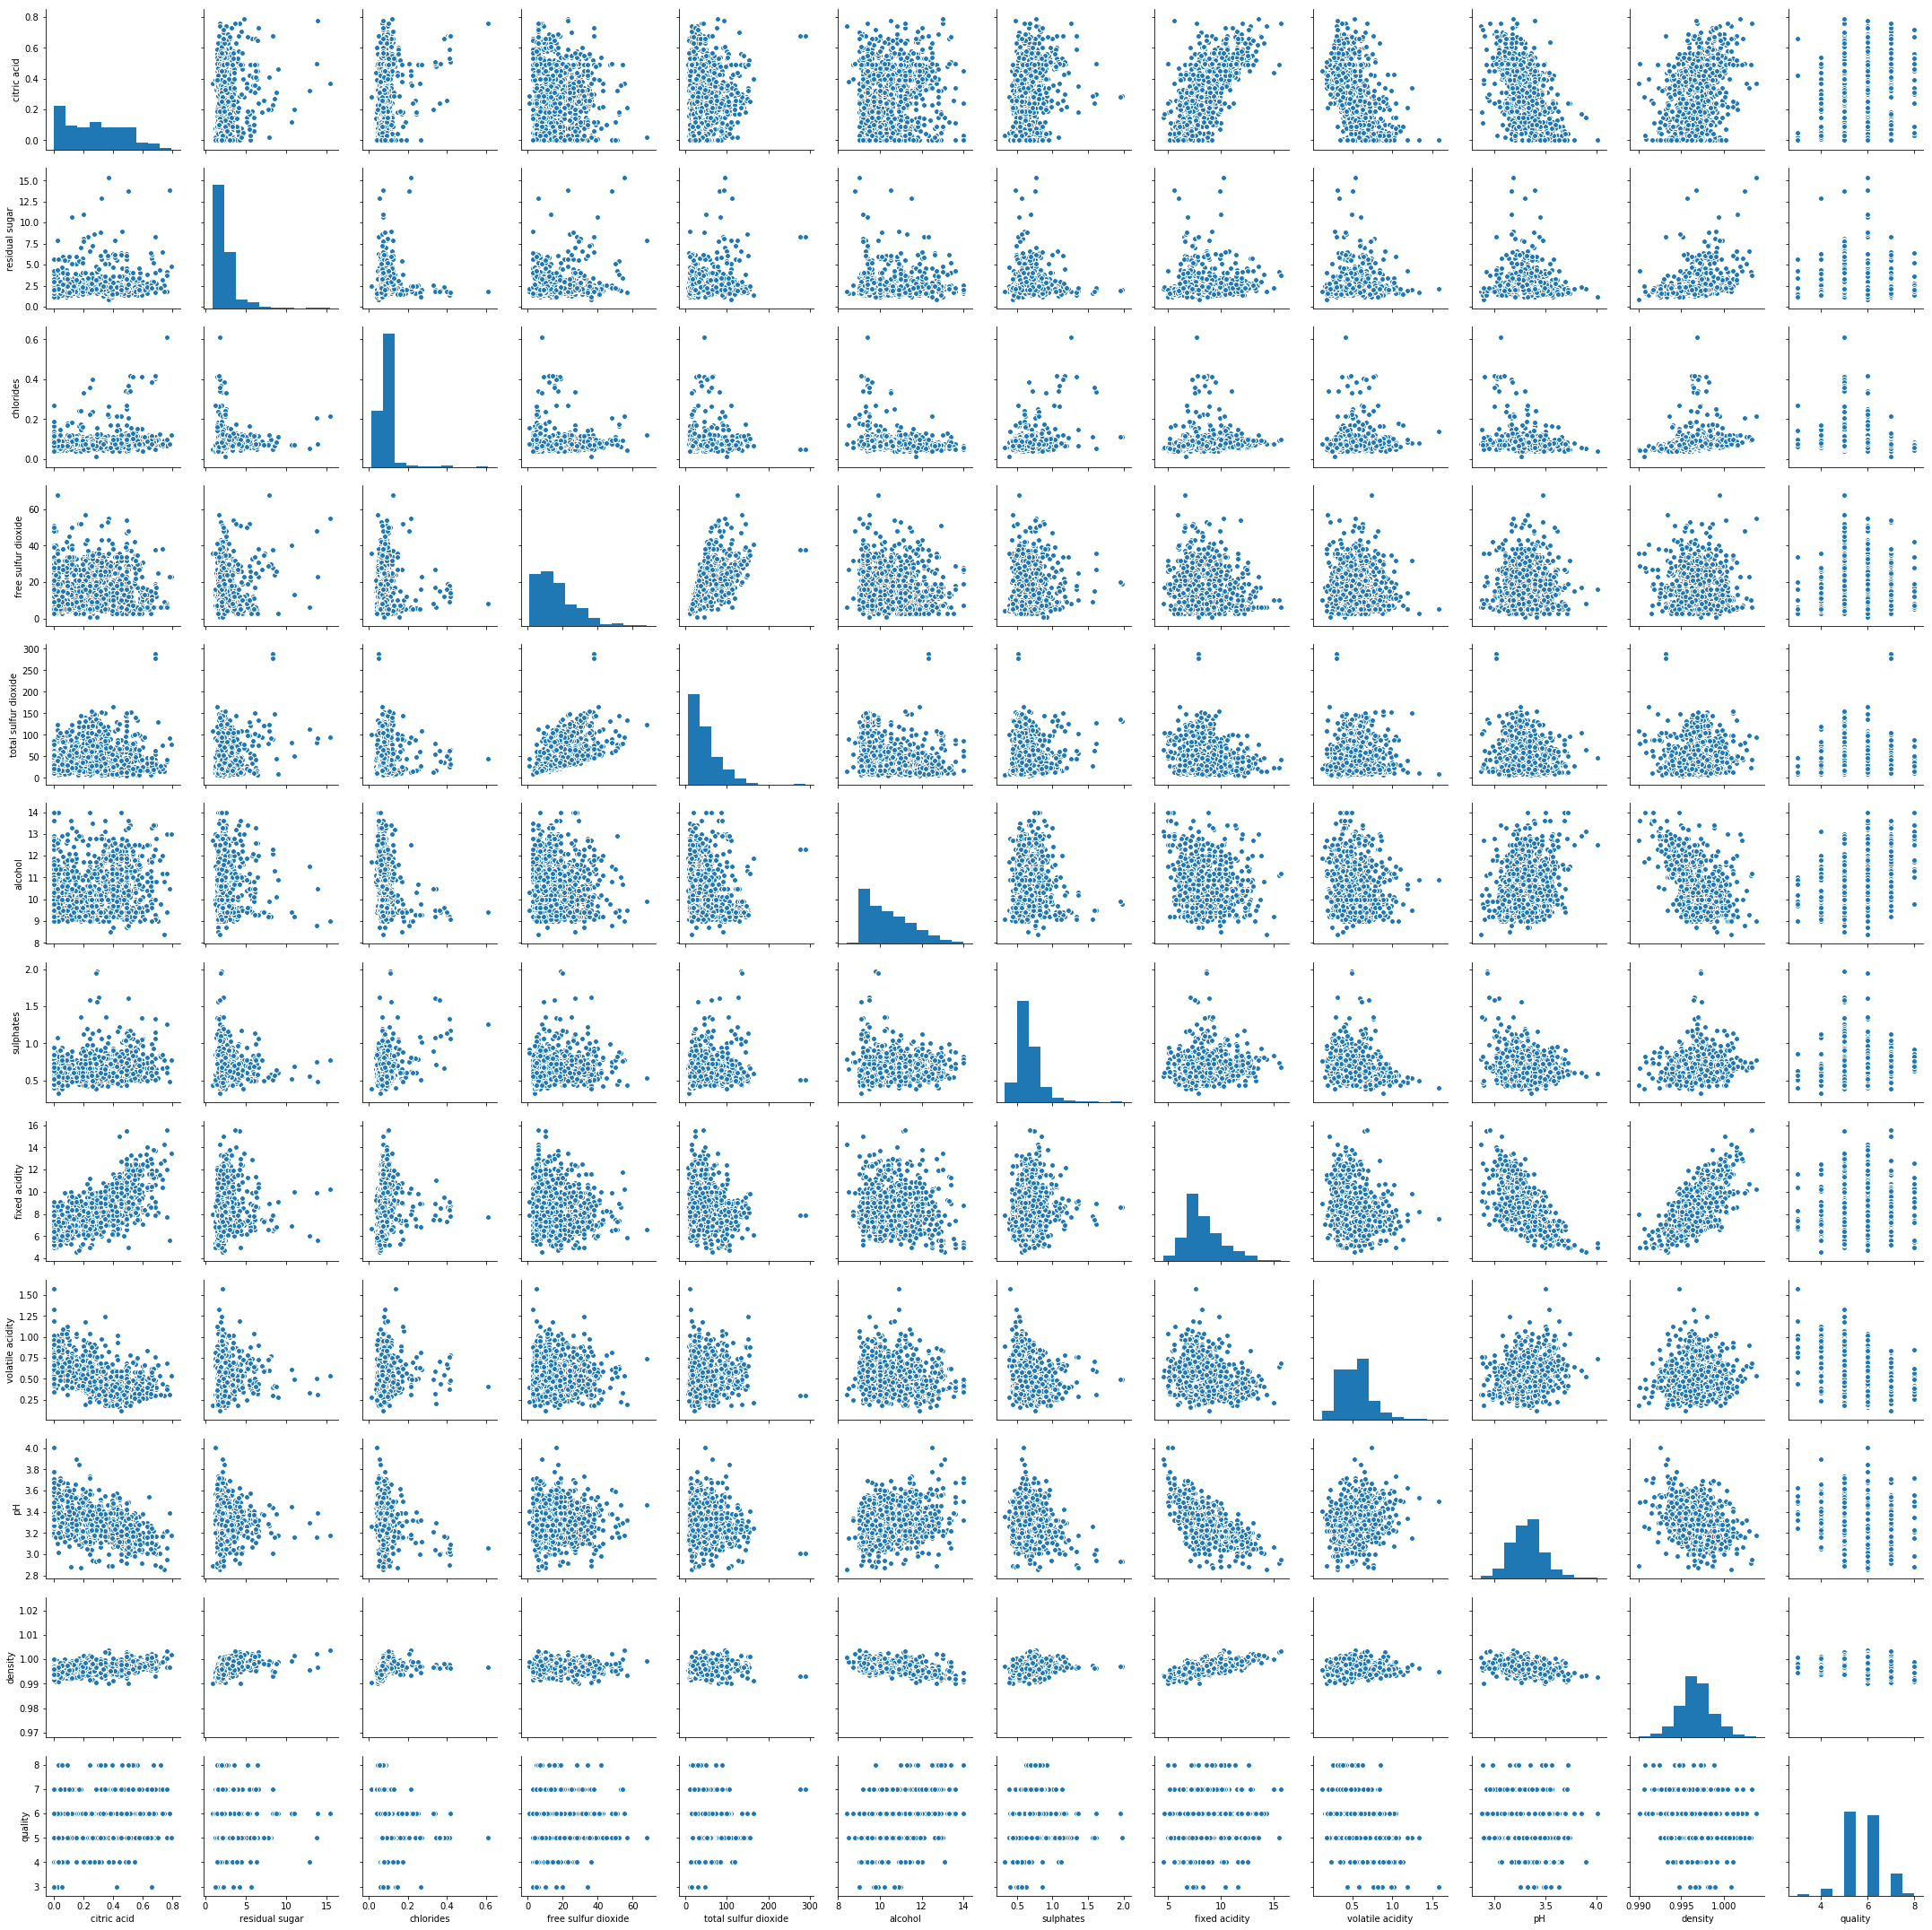

In [7]:
#lotting pairplot for the dataset

sns.pairplot(train[['citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','alcohol','sulphates','fixed acidity','volatile acidity','pH','density','quality']])
plt.show()

                      fixed acidity  volatile acidity  citric acid  chlorides  \
fixed acidity              1.000000         -0.258453     0.681178   0.110165   
volatile acidity          -0.258453          1.000000    -0.556398   0.081845   
citric acid                0.681178         -0.556398     1.000000   0.179303   
chlorides                  0.110165          0.081845     0.179303   1.000000   
alcohol                   -0.080560         -0.184904     0.100890  -0.227639   
sulphates                  0.169745         -0.242959     0.279116   0.316113   
total sulfur dioxide      -0.110639          0.080152     0.037077   0.039598   
pH                        -0.679637          0.239279    -0.547191  -0.258811   
quality                    0.124049         -0.379438     0.233872  -0.119226   

                       alcohol  sulphates  total sulfur dioxide        pH  \
fixed acidity        -0.080560   0.169745             -0.110639 -0.679637   
volatile acidity     -0.184904  -0.

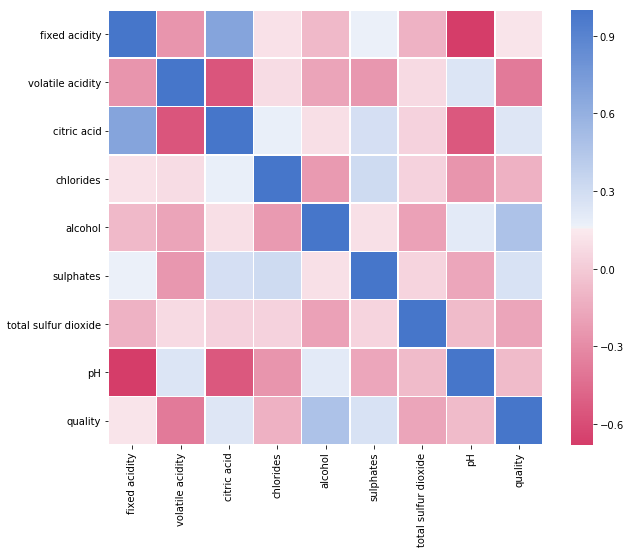

In [8]:
# Plotting crrelation matrices for dataset

cmap = sns.diverging_palette(0,255,sep=1, n=256,as_cmap=True)
correlation=train[['fixed acidity','volatile acidity','citric acid','chlorides','alcohol','sulphates','total sulfur dioxide','pH','quality']].corr()
print(correlation);

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values, fmt="g",vmax=1,square=True, cmap=cmap,linewidths=.5,ax=ax)
plt.savefig(cur_path+'/outcome/HeatMapForCorrelation.jpg',bbox_inches="tight")
plt.show()

#### Linear Regression:
- Linear regression predicts the response variable  yy  assuming it has a linear relationship with predictor variable(s)  xx  or  x1,x2,,,,x

#### Is the relationship significant? 
##### Using Correlation method and by plotting predictor vs response plots, we can verify the relationship

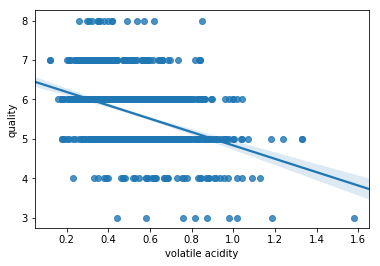

In [9]:
x=train['volatile acidity']
y=train['quality']
sns.regplot(x,y,data=train)
plt.savefig(cur_path+'/outcome/chloridesVspHRegPlot.jpg')
plt.show()

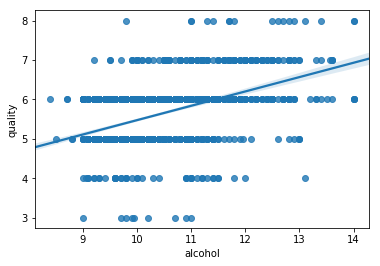

In [10]:
x=train['alcohol']
y=train['quality']
sns.regplot(x,y,data=train)
plt.savefig(cur_path+'/outcome/alcoholVspHRegPlot.jpg')
plt.show()

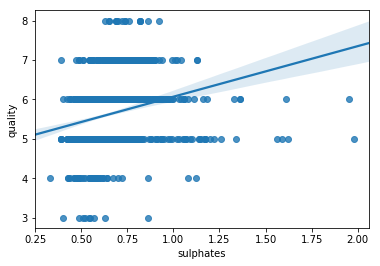

In [11]:
x=train['sulphates']
y=train['quality']
sns.regplot(x,y,data=train)
plt.savefig(cur_path+'/outcome/sulphatesVspHRegPlot.jpg')
plt.show()

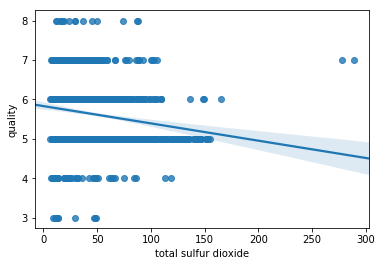

In [12]:
x=train['total sulfur dioxide']
y=train['quality']
sns.regplot(x,y,data=train)
plt.savefig(cur_path+'/outcome/resSugarVspHRegPlot.jpg')
plt.show()

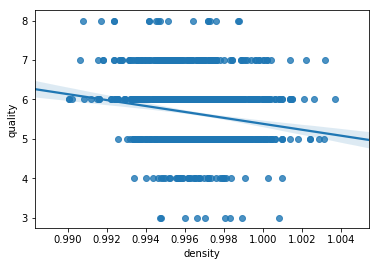

In [13]:
x=train['density']
y=train['quality']
sns.regplot(x,y,data=train)
plt.savefig(cur_path+'/outcome/resSugarVspHRegPlot.jpg')
plt.show()

##### Conclusion:
- From above we can say that, there can be significant relationship between Sulphates and Quality.
- Change in quantity of this parameters will affect the Quality of Wine

#### Are any model assumptions violated? 

##### Conclusion:
- From above we can say that, there can be significant relationship between Volatile Acidity, alcohol and Sulphates with the Quality.
- Change in quantity of these parameters will affect the quality of Wine

#### Is there any multi-colinearity in the model? 

##### MultiCollinearity:
-  Multicollinearity (also collinearity) is a phenomenon in which two or more predictor variables in a multiple regression model are highly correlated, meaning that one can be linearly predicted from the others with a non-trivial degree of accuracy.

                  fixed acidity  volatile acidity        pH  chlorides  \
fixed acidity          1.000000         -0.258453 -0.679637   0.110165   
volatile acidity      -0.258453          1.000000  0.239279   0.081845   
pH                    -0.679637          0.239279  1.000000  -0.258811   
chlorides              0.110165          0.081845 -0.258811   1.000000   
alcohol               -0.080560         -0.184904  0.210260  -0.227639   
sulphates              0.169745         -0.242959 -0.169375   0.316113   

                   alcohol  sulphates  
fixed acidity    -0.080560   0.169745  
volatile acidity -0.184904  -0.242959  
pH                0.210260  -0.169375  
chlorides        -0.227639   0.316113  
alcohol           1.000000   0.106308  
sulphates         0.106308   1.000000  


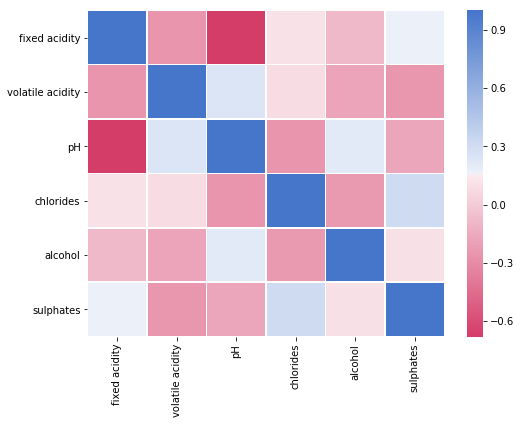

In [14]:
cmap = sns.diverging_palette(0,255,sep=1, n=256,as_cmap=True)
correlation=train[['fixed acidity','volatile acidity','pH','chlorides','alcohol','sulphates']].corr()
print(correlation);
fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values, fmt="g", cmap=cmap,linewidths=.5,ax=ax)
plt.savefig(cur_path+'/outcome/HeatMapForMultiColinearity.jpg',bbox_inches="tight")
plt.show()

##### Conclusion:
- Yes, there is more multi-colinearity in 
    * (fixed acidity, sulphates)
    * (volatile acidity, pH)
    * (pH, alcohol) and 
    * (chlorides,sulphates)

#### In the multiple regression models are predictor variables independent of all the other predictor variables? 

##### Multiple Regression:
- Multiple linear regression is the extension of a single predictor variable  xx  to a set predictor variables, { x1,x2,x2,...xnx1,x2,x2,...xn }, that is

- Y=β1x1+β2x2+β3x3+βnxn+ε
- Y=β1x1+β2x2+β3x3+βnxn+ε
 
- These n equations are stacked together and written in vector form as

- Y=βX+ε
- Y=βX+ε
 
- Where  YY ,  betabeta , and  εε  are vectors and  XX  is a matrix (sometimes called the design matrix).

- It is used when we want to predict the value of a variable based on the value of two or more other variables. The variable we want to predict is called the dependent variable (or sometimes, the outcome, target or criterion variable)

In [15]:
X = train[['fixed acidity','volatile acidity','pH','chlorides','alcohol','sulphates']]
y = train[["quality"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[ 3.7128499] [[ 0.01198839 -1.02230148 -0.41654016 -1.487542    0.31907176  0.82676828]]


In [16]:
OLS_model = sm.OLS(y, X)
OLS_results = OLS_model.fit()
OLS_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 1.556e+04
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        18:08:18   Log-Likelihood:                -1281.5
No. Observations:                1279   AIC:                             2575.
Df Residuals:                    1273   BIC:                             2606.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
fixed acidity        0.0732      0.010      7.292      0.000       0.053       0.093
volatile acidity    -0.9978      0.113     -8.846      0.000      -1.219      -0.777
pH                   0.4776      0.066      7.228      0.000       0.348       0.607
chlorides           -0.7958      0.461     -1.726      0.085      -1.700       0.109
alcohol              0.3325      0.019     17.898      0.000       0.296       0.369
sulphates            0.8682      0.126      6.906      0.000       0.622       1.115
==============================================================================
Omnibus:                       32.364   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.416
Skew:                          -0.216   Prob(JB):                     4.15e-12
Kurtosis:                       3.893   Cond. No.                         347.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Conclusion:
- They are almost Independent.
- In general to assess the fit of the model one can use summary measures of goodness of fit (such as  R2 )
- From above R2 is 0.981 which is a good fit

#### In Multiple Regression models, rank the most significant predictor variables and exclude insignificant ones from the model.

In [18]:
#Rank co-efficients 
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimates'] =results.coef_.reshape(6,1)
coeff_df

coeff_df['coef_ranked'] = coeff_df['Coefficient Estimates'].rank(ascending=0)
coeff_df

,Features,Coefficient Estimates,coef_ranked
0,fixed acidity,0.011988,3.0
1,volatile acidity,-1.022301,5.0
2,pH,-0.416540,4.0
3,chlorides,-1.487542,6.0
4,alcohol,0.319072,2.0
5,sulphates,0.826768,1.0


##### Conclusion:
- From above Co-efficient estimates, significant predictor variables are very clear.

#### Does the model make sense?

In [19]:
#predicting response
y_pred = results.predict(test[['fixed acidity','volatile acidity','pH','chlorides','alcohol','sulphates']])
rmse = np.sqrt(metrics.mean_squared_error(test['quality'], y_pred))
print(rmse)

0.656492120746


Text(0.5,1,'Quality VS Predicted Quality : $Y_i$ vs $\\hat{y}_i$')

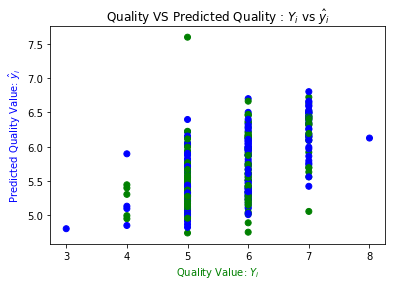

In [20]:
plt.scatter(test["quality"], y_pred, color=['green','blue'])
plt.xlabel("Quality Value: $Y_i$", color='green')
plt.ylabel("Predicted Quality Value: $\hat{y}_i$", color='blue')
plt.title("Quality VS Predicted Quality : $Y_i$ vs $\hat{y}_i$")
plt.savefig(cur_path+'/outcome/ScatterPlotLinear.jpg',bbox_inches="tight")

- By plotting predicted values VS actual test values, we can see that all the predicted values are almost aligned with actual values of Test Data

#### Does regularization help?

- Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them towards zero.
- It reduces model variance which minimizes overfitting.
- For a regularized linear regression model, we minimize the sum of RSS and a "penalty term" that penalizes coefficient size.

###### Ridge regression (or "L2 regularization") minimizes:
                                                * RSS+α∑j=1pβ2j
                                                * RSS+α∑j=1pβj2
 
###### Lasso regression (or "L1 regularization") minimizes:
                                                * RSS+α∑j=1p|βj|
                                                * RSS+α∑j=1p|βj|
 
- pp  is the number of features
- βjβj  is a model coefficient
- αα  is a tuning parameter:

- A tiny  αα  imposes no penalty on the coefficient size, and is equivalent to a normal linear regression model.
- Increasing the  αα  penalizes the coefficients and thus shrinks them.

###### - Using Ridge Regression:

In [22]:
X = train[['fixed acidity','volatile acidity','pH','chlorides','alcohol','sulphates']]
ridge = Ridge(fit_intercept=True, alpha=0.5)
results = ridge.fit(X,y)
y_pred_ridge = results.predict(test[['fixed acidity','volatile acidity','pH','chlorides','alcohol','sulphates']])
rmse =np.sqrt(metrics.mean_squared_error(test['quality'], y_pred_ridge))
print(rmse)

0.658255384814


Text(0.5,1,'Ridge Regression - Quality vs Predicted Quality: $Y_i$ vs $\\hat{y}_i$')

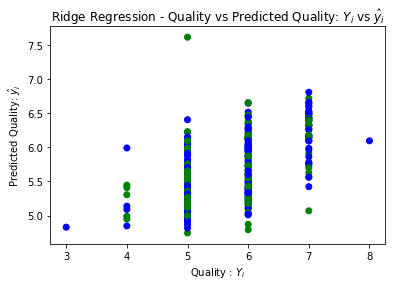

In [23]:
plt.scatter(test["quality"], y_pred_ridge,color=['green','blue'])
plt.xlabel("Quality : $Y_i$")
plt.ylabel("Predicted Quality: $\hat{y}_i$")
plt.title("Ridge Regression - Quality vs Predicted Quality: $Y_i$ vs $\hat{y}_i$")
plt.savefig(cur_path+'/outcome/ScatterPlotRidge.jpg',bbox_inches="tight")

##### Conclusion:
- After using ridge regression rmse has increased.
- Hence, Regularization does not help.

#### Cross-validate the model. How well did it do?  

In [25]:
features = ['volatile acidity', 'citric acid','chlorides','total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']
x = winequality_frame[features]
y = winequality_frame['quality']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=3)
regressor = LinearRegression()
regressor.fit(x_train,y_train)
accuracy = regressor.score(x_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 38%'

##### Conclusion:
- Accuracy is just 38 percent, which is low.